<a href="https://colab.research.google.com/github/Johnny-W-05/Aprendizaje-Automatico/blob/main/Reto02_AndradeEscobarVillenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Carrera de Ciencia de Datos</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático &bull; Reto 2
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-01
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Integrantes: Andrade Juan, Escobar David, Villenas Nathaly
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Arquitectura del Riesgo: Identificación de Perfiles de Vivienda Vulnerables al Mal de Chagas en Ecuador </font>



El mal del chagas es una enfermedad parasitaria que afecta al corazón y al estómago. Es transmitida por el patógeno Trypanosoma cruzi que llega al cuerpo humano a través de chinches u otros insectos que chupen sangre. En el Ecuador, el Ministerio de Salud Pública (2025)
menciona que existe un aumento en la cantidad de contagios del Mal del Chagas y alertó a las autoridades para implementar medidas preventivas.

La misión de este documento es utilizar modelos de aprendizaje supervisado para detectar el estatus entomológico de la enfermedad, es decir, ser capaces de predecir la presencia de la enfermedad en base al valor de las variables seleccionadas.

Buscando específicamente concretar estos objetivos:
- Encontrar factores que indiquen patrones estructurales, sanitarias y ambientales para la verificación de la presencia del estatus entomológico.
- Analizar los resultados de los distintos modelos para llegar a una conclusión objetiva
- Aportar el futuro análisis de los investigadores que puedan usar estos recursos en función de nuevas soluciones al problema del mal de Chagas.

Las técnicas que vamos a utilizar son:

- SVM (Support Vector Machine): modelo supervisado que busca la mejor frontera de separación entre clases maximizando el margen, en caso de no encontrar una separación puede utilizar transformaciones entre dimensiones para obtenerla.
- Red Neuronal: modelo compuesto por capas de neuronas que aprende patrones complejos mediante ajustes iterativos de pesos que desencadenan funciones de activación.
- Random Forest: conjunto de árboles de decisión entrenados sobre muestras aleatorias.

---
## <font color='264CC7'> Carga de Librerías </font>

Los paquetes necesarios son:

In [45]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización
import numpy as np
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
# Paquetes necesarios (Red Neuronal)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.utils import to_categorical

---
## <font color='264CC7'> Lectura de datos </font>

Primero, empezamos con la carga de los datos.

In [2]:
# Cargar datos
df = pd.read_csv("https://github.com/DashTT/Reto-01-Chagas/blob/main/Conjunto%20de%20datos%20Viviendas_Loja_2005-20251215/Viviendas_Loja_2005.csv?raw=true")
display(df.head())
print(f"Filas: {df.shape[0]} Columnas {df.shape[1]}")
print(df['Status entomologico'].unique())


,Código,Status entomologico,Estado,Localidad,Altitud,Longitud,Latitud,A2. Cuantos dormitorios tiene la vivienda,A3 Número de personas que duermen en la vivienda,A4. Duermen 3 o mas personas en algun dormitorio,...,J3 Cuántas,J4. Palma Africana,J4 Distancia de la casa (metros),J4 Cuántas,J5. Otro tipo de de palmera o palma,J5 Cuál,J5 Distancia de la casa (metros),J5 Cuántas,E10 Cuántos,Unnamed: 138
0,AB007,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,5.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,2.0,NaN
1,AB207,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,1.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN
2,AB208,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,5.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN
3,AB209,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,3.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN
4,AB210,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,2.0,10.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN


Filas: 1000 Columnas 139
['Negativa' 'Positiva']


---
## <font color='264CC7'> Selección  y preparación de variables </font>


Ahora, el proceso de selección tomó varias cosas a consideración. Estas consideraciones fueron:
* Animales que pueden portar las chinches de familia Triatominae.
* Lugares idóneos donde habitan estas chinches.
* Materiales de acumulación de temperatura ideal para su forma de vida.
* Condiciones climáticas que favorecen su aparición (humedad, luminicidad, entre otros).

Explicación de las variables seleccionadas

Todas estas variables seleccionadas son variables binarias, es decir, pueden únicamente tener un valor positivo (1) y negativo (0). A continuación, se las describirá cada una por su caso positivo:

- Servicio Higienico: Contiene un escusado exlusivo del hogar.
- Techo hormigon: Tiene techo de hormigón.
- Techo asbestos o similares: Tiene techo de asbestos o similares.
- Techo zinc: Tiene techo de zinc.
- Techo teja: Tiene techo de teja.
- Techo palma o similares: Tiene techo de palma o similares.
- Techo otros materiales: Tiene techo de otros materiales diferentes mencionados previamente.
- ParExt HormigonBloqueLadrillo: La pared externa es de bloques de ladrillos.
- ParExt Adobe Tapia: La pared externa es de Adobe.
- ParExt Madera: La pared externa es de madera.
- ParExt GuaRevPapel: La pared externa es de caña guadua revestida con papel.
- ParExt GuadRev o RellBarro: La pared externa es de caña guadua revestida o rellena con barro.
- ParExt GuadNoRev: La pared externa es de caña guadua sin revestimiento.
- Piso entablado rustico: El piso es de entablado rústico.
- Piso parquet: El piso es de parquet.
- Piso baldosa: El piso es de baldosa.
- Piso ladrillo o cemento: El piso es de ladrillo o cemento.
- Piso caña guadua: El piso es de caña guadua.
- Piso tierra: El piso es de tierra.
- Piso otros: El piso es de otros materiales no especificados.
- Gallinas: Hay presencia de gallinas en un radio menor a cinco metros.
- Cuyera: Hay presencia de cuyes en un radio menor a cinco metros.
- CorralChivosOvejas: Hay presencia de ovejas o chivos en un radio menor a cinco metros.
- Ratones: Avistamiento frecuente de ratones durante los últimos seis meses.
- Ratas: Avistamiento frecuente de ratas durante los últimos seis meses.
- Hojas Palma Coco: Existe acumulación de hojas palma de Coco alrededor de la vivienda.
- Hojas de palma cade o tagua: Existe acumulación de hojas de palma de Cade o Tagua alrededor de la vivienda.
- Hojas de otro tipo de palmera o palma: Existen hojas de otros tipos de palmera o palma.
- Desperdicios de cosecha: Existe acumulación de desperdicios de la cosecha.
- Productos agrícolas de cosecha: Existe acumulación de productos agrícolas de la cosecha.
- Piñuelas: Presencia de Piñuelas alrededor a la vivienda.
- Arbustos: Presencia de Arbustos alrededor a la vivienda.
- Arboles frutales: Presencia de Arbustos frutales a la vivienda.
- Maleza o monte: Presencia de maleza o monte alrededor a la vivienda.
- Palma coco: Presencia de palma de coco alrededor de 30 metros de la vivienda.
- Palma cade o tagua: Presencia de palma de Cade o Tagua alrededor de 30 metros de la vivienda.
- Palma africana: Presencia de palma de coco alrededor de 30 metros de la vivienda.
- Otro tipo de de palmera o palma: Presencia de otros tipos de palmera o palma no mencionados antes alrededor de 30 metros de la vivienda.

Renombrar variables verdadero o falso

In [3]:
# Renombrar columnas booleanas (VERDADERO / FALSO)
rename_bool_cols = {
    "A5 Escusado de uso exclusivo del hogar": "Servicio Higienico",
    "B1 Losa de hormigón": "Techo hormigon",
    "B1 Asbestos o similares": "Techo asbestos o similares",
    "B1 Zinc": "Techo zinc",
    "B1 Teja": "Techo teja",
    "B1 Paja palma o similares": "Techo palma o similares",
    "B1 Otros materiales": "Techo otros materiales",
    "B2 Hormigón ladrillo o bloque": "ParExt HormigonBloqueLadrillo",
    "B2 Adobe o tapia": "ParExt AdobeTapia",
    "B2 Madera": "ParExt Madera",
    "B2 Caña guadua revestida con papel": "ParExt GuaRevPapel",
    "B2 Caña guadua revestida o rellena de barro": "ParExt GuadRev o RellBarro",
    "B2 Caña guadua no revestida": "ParExt GuadNoRev",
    "B3 Entablado rústico": "Piso entablado rustico",
    "B3 Parquet": "Piso parquet",
    "B3 Baldosa o vinyl": "Piso baldosa",
    "B3 Ladrillo o cemento": "Piso ladrillo o cemento",
    "B3 Caña guadua": "Piso caña guadua",
    "B3 Tierra": "Piso tierra",
    "B3 Otros materiales": "Piso otros",
}

cols_interes = [entry for entry in rename_bool_cols.values()]
df = df.rename(columns=rename_bool_cols)

map_bool = {"VERDADERO": 1, "FALSO": 0}

df[cols_interes] = df[cols_interes].replace(map_bool)



/tmp/ipython-input-4034516437.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_interes] = df[cols_interes].replace(map_bool)


Recodificar las variables binarias E2, E6, E9, F1, F2

In [4]:
df["Gallinas"] = np.where(df["E2. Donde"].isin([1, 2, 3]), 1, 0).astype(int)

# Cuyera: 1,2,3 = 1  /  0,4,5,6 = 0
df["Cuyera"] = np.where(df["E6. Donde"].isin([1, 2, 3]), 1, 0).astype(int)

# Corral chivos/ovejas: 1,2,3 = 1  /  4,5,0 = 0
df["CorralChivosOvejas"] = np.where(df["E9. Donde"].isin([1, 2, 3]), 1, 0).astype(int)

# Ratones: 1,2 = 0 (nunca / rara vez), 3,4 = 1 (frecuente / todo el tiempo)
df["Ratones"] = np.where(df["F1. Ratones"].isin([3, 4]), 1, 0).astype(int)

# Ratas: igual criterio que Ratones
df["Ratas"] = np.where(df["F2. Ratas"].isin([3, 4]), 1, 0).astype(int)

cols_interes.extend(["Gallinas", "Cuyera", "CorralChivosOvejas", "Ratones", "Ratas"])

Recodificar las variables tránsfugas

In [5]:
def recode_1_else_0(series):
    return np.where(series == 1, 1, 0).astype(int)
# H: material vegetal acumulado
df["Hojas Palma Coco"] = recode_1_else_0(df["H1. Hojas de Palma de coco"])
df["Hojas de palma cade o tagua"] = recode_1_else_0(df["H2. Hojas de Palma de Cade o tagua"])
df["Hojas de otro tipo de palmera o palma"] = recode_1_else_0(df["H3. Hojas de Palmera (Otro Tipo)"])
df["Desperdicios de cosecha"] = recode_1_else_0(df["H4. Desperdicios de la cosecha"])
df["Productos agrícolas de cosecha"] = recode_1_else_0(df["H5. Productos agricolas de la cosecha"])

# I: vegetación alrededor de la vivienda
df["Piñuelas"] = recode_1_else_0(df["I1. Piñuelas"])
df["Arbustos"] = recode_1_else_0(df["I2. Arbustos"])
df["Arboles frutales"] = recode_1_else_0(df["I3. Arboles frutales"])
df["Maleza o monte"] = recode_1_else_0(df["I4. Maleza o monte"])

# J: palmas cercanas (a 30 m)
df["Palma coco"] = recode_1_else_0(df["J2. Palmas de coco"])
df["Palma cade o tagua"] = recode_1_else_0(df["J3. Palmas de cade o tagua"])
df["Palma africana"] = recode_1_else_0(df["J4. Palma Africana"])
df["Otro tipo de de palmera o palma"] = recode_1_else_0(df["J5. Otro tipo de de palmera o palma"])

cols_interes.extend([
    "Hojas Palma Coco",
    "Hojas de palma cade o tagua",
    "Hojas de otro tipo de palmera o palma",
    "Desperdicios de cosecha",
    "Productos agrícolas de cosecha",
    "Piñuelas",
    "Arbustos",
    "Arboles frutales",
    "Maleza o monte",
    "Palma coco",
    "Palma cade o tagua",
    "Palma africana",
    "Otro tipo de de palmera o palma"
])


---
## <font color='264CC7'> Limpieza de datos </font>


Selección final y limpieza para trabajo

In [6]:
#Creamos un df previo a la limpieza
df_precleaning = df[cols_interes].copy()

#Calculamos outliers
df_precleaning.isna().sum()

# 11 NA en todos, son coincidentes?

#(df_precleaning.isna().sum().nunique() == 1)
# Sí son. Considerando que 11/1000 = 1.1% y que todos esos NA coinciden en la entrada, vamos a considerarlo como despreciable
# Las variables binarias no tienen outliers así que únicamente nos enfocamos en los nulos

df_clean = df_precleaning.dropna()

y_status = df.loc[df_clean.index, "Status entomologico"]

print(len(cols_interes))


38


---
## <font color='264CC7'> Análisis exploratorio </font>


In [7]:
summary = df_clean[cols_interes].describe()
print(summary.to_string())


       Servicio Higienico  Techo hormigon  Techo asbestos o similares  Techo zinc  Techo teja  Techo palma o similares  Techo otros materiales  ParExt HormigonBloqueLadrillo  ParExt AdobeTapia  ParExt Madera  ParExt GuaRevPapel  ParExt GuadRev o RellBarro  ParExt GuadNoRev  Piso entablado rustico  Piso parquet  Piso baldosa  Piso ladrillo o cemento  Piso caña guadua  Piso tierra  Piso otros    Gallinas      Cuyera  CorralChivosOvejas     Ratones       Ratas  Hojas Palma Coco  Hojas de palma cade o tagua  Hojas de otro tipo de palmera o palma  Desperdicios de cosecha  Productos agrícolas de cosecha    Piñuelas    Arbustos  Arboles frutales  Maleza o monte  Palma coco  Palma cade o tagua  Palma africana  Otro tipo de de palmera o palma
count          989.000000      989.000000                  989.000000  989.000000  989.000000               989.000000              989.000000                     989.000000         989.000000     989.000000          989.000000                  989.000000 

In [8]:
#Creamos una df que contenga la proporción de positivos y negativos de cada una de las variables
prop_1 = df_clean[cols_interes].mean() #proporción de 1
prop_0 = 1 - prop_1 #proporción de 0
prop_df = pd.DataFrame({
    'Negativo (0)': prop_0,
    'Positivo (1)': prop_1
})

print(prop_df)

                                       Negativo (0)  Positivo (1)
Servicio Higienico                         0.687563      0.312437
Techo hormigon                             0.960566      0.039434
Techo asbestos o similares                 0.945399      0.054601
Techo zinc                                 0.875632      0.124368
Techo teja                                 0.190091      0.809909
Techo palma o similares                    0.967644      0.032356
Techo otros materiales                     0.958544      0.041456
ParExt HormigonBloqueLadrillo              0.724975      0.275025
ParExt AdobeTapia                          0.339737      0.660263
ParExt Madera                              0.959555      0.040445
ParExt GuaRevPapel                         0.992922      0.007078
ParExt GuadRev o RellBarro                 0.951466      0.048534
ParExt GuadNoRev                           0.998989      0.001011
Piso entablado rustico                     0.925177      0.074823
Piso parqu

In [9]:
# Conteo de clases
conteo = y_status.value_counts()
print(conteo)

# Proporción
proporcion = y_status.value_counts(normalize=True)
print(proporcion)


Status entomologico
Negativa    889
Positiva    100
Name: count, dtype: int64
Status entomologico
Negativa    0.898888
Positiva    0.101112
Name: proportion, dtype: float64


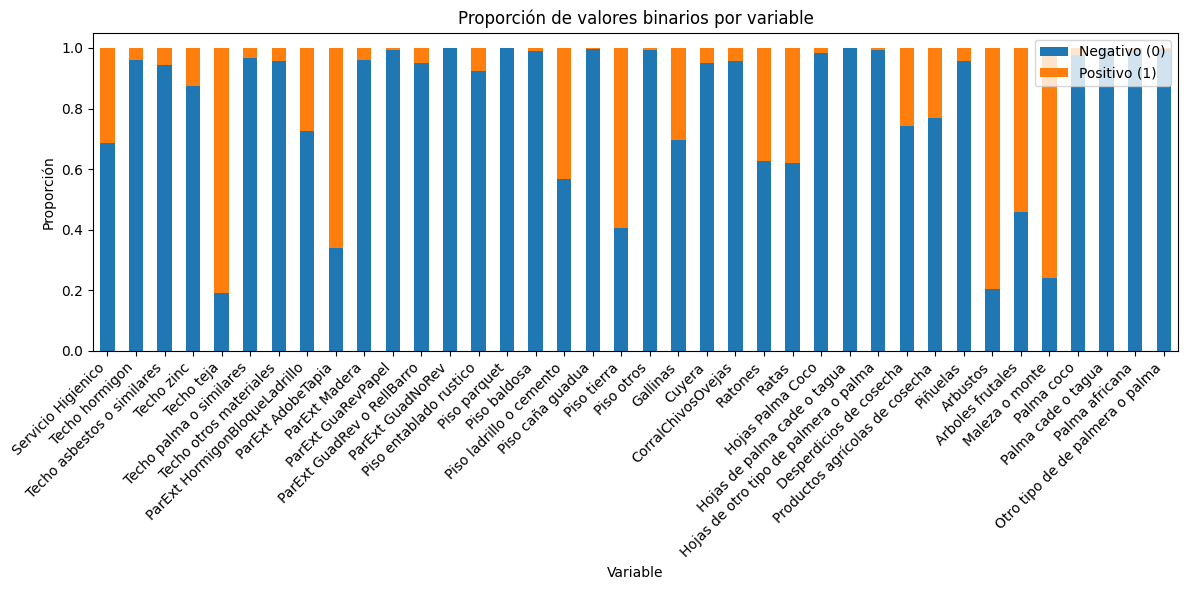

In [10]:
prop_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.ylabel('Proporción')
plt.xlabel('Variable')
plt.title('Proporción de valores binarios por variable')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# <font color='264CC7'> Aplicación de modelos </font>


##**Decision Tree**

In [ ]:
# ===============================
# Árbol de Decisión
# ===============================
modelo_tree = DecisionTreeClassifier(criterion='entropy')
modelo_tree.fit(X_train, y_train)

# Predicciones
y_pred_tree = modelo_tree.predict(X_test)

# Evaluación
accuracy_tree = round(accuracy_score(y_test, y_pred_tree), 2)
print("Precisión Árbol de Decisión:", accuracy_tree)

print("\nMatriz de confusión (Árbol):")
print(confusion_matrix(y_test, y_pred_tree))

print("\nReporte de clasificación (Árbol):")
print(classification_report(y_test, y_pred_tree))


Precisión Árbol de Decisión: 0.88

Matriz de confusión (Árbol):
[[174   8]
 [ 15   1]]

Reporte de clasificación (Árbol):
              precision    recall  f1-score   support

    Negativa       0.92      0.96      0.94       182
    Positiva       0.11      0.06      0.08        16

    accuracy                           0.88       198
   macro avg       0.52      0.51      0.51       198
weighted avg       0.86      0.88      0.87       198



**Random Forest**

In [ ]:
# ===============================
# Random Forest
# ===============================
modelo_rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight={'Negativa': 1, 'Positiva': 11}, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación
accuracy_rf = round(accuracy_score(y_test, y_pred_rf), 2)
print("Precisión Random Forest:", accuracy_rf)

print("\nMatriz de confusión (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Precisión Random Forest: 0.79

Matriz de confusión (Random Forest):
[[149  33]
 [  9   7]]

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

    Negativa       0.94      0.82      0.88       182
    Positiva       0.17      0.44      0.25        16

    accuracy                           0.79       198
   macro avg       0.56      0.63      0.56       198
weighted avg       0.88      0.79      0.83       198



##**Red Neuronal**

In [27]:
#Creamos X y y
X = df_clean
y = y_status
y.unique() #vemos que las categorías estan como 'Negativa' y 'Positiva' y se debe cambiar
y= y.map({'Negativa': 0, 'Positiva': 1}) #se hace el cambio
print(X.shape)
print(y.shape)

(989, 38)
(989,)


In [13]:
# Fijamos las semillas para reproducibilidad
import random
import os
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.config.experimental.enable_op_determinism()
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
    os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [86]:
#Definimos la red para estos datos con 3 capas ocultas y una de salida de 2 neuronas
set_seed(11)
model = Sequential([
    Input(shape=(38,)), #Son 38 variables las que se van a analizar en el modelo
    Dense(units=6, activation='relu'),
    Dense(units=3, activation='relu'),
    Dense(units=1, activation='sigmoid') #Usamos sigmoide por su distribución entre 0 y 1 perfecta para valores binarios como los que trabajamos en este dataset.
])

# Compilamos el modelo
optimizer = SGD(learning_rate=0.01)
loss = BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss)
# Resumen del modelo
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 6)              │           234 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259 (1.01 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
#Ahora entrenamos y evaluamos el modelo primero dividiendo los datos de train y test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(791, 38)
(791,)
(198, 38)
(198,)


In [87]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6976
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6480 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6069 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5716 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5406 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5135 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4896 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4685 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4500 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4335 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4189 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4061 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3947
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3847 
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

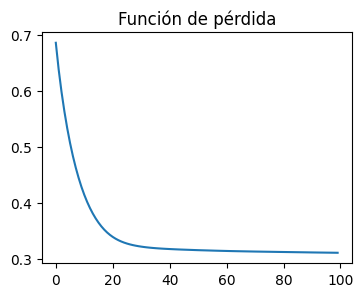

In [88]:
# Visualizar la evolución de la función de pérdida
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.title('Función de pérdida')
plt.show()

In [89]:
#Evaluamos el modelo entrenado
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss test: {test_loss:.4f}")
#Creamos la matriz de confusión
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
print("Matriz de confusión:")
print(cm)

#Creamos el reporte de clasificacion
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_classes))

Loss test: 0.3690
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Matriz de confusión:
[[174   0]
 [ 24   0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       174
           1       0.00      0.00      0.00        24

    accuracy                           0.88       198
   macro avg       0.44      0.50      0.47       198
weighted avg       0.77      0.88      0.82       198



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
